# Perspective Transformation: Parallel Lines, Fixed Points and Infinite Points

A small demo notebook designed to give some intuition about the perspective transformation. 

Written by Max Kohlbrenner

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def plot_transformation(lines, A, x0, lineplot=True, scatter=True):
    nl = lines.shape[0] # number of distinct lines
    nv = lines.shape[1] # number of vertices per line
    lines = lines.reshape(-1, 2)
    # add homogeneous coordinate
    lines = np.concatenate([lines, np.ones((lines.shape[0], 1))], axis=1)
    
    fig = plt.figure(figsize=(10, 6))
    plt.axhline(0., c='black', lw=0.5)
    plt.axvline(0., c='black', lw=0.5)
    plt.axvline(x0 , ls='--', c='c',  label='View       Plane')
    plt.axvline( 0 , ls='--', c='m',  label='Projection Plane')
    plt.axvline(-x0, ls='--', c='y', label='Vanishing   Plane')
    
    # plot lines pre:
    if lineplot:
        lines_rs = lines.reshape(nl, nv, 3)
        plt.plot(lines_rs[:,:,0], lines_rs[:,:,1], c='b')
    if scatter:
        plt.scatter(lines[:,0], lines[:,1], c='b', label='PRE projective transformation')
    
    # apply projective transformation in homogeneous coordinates
    values_projected_hom   = lines.dot(A.T)
    # divide by w and transform back to normal coordinates
    values_post_projection = values_projected_hom[:,:2] / values_projected_hom[:,-1][:,None]
    # plot projected lines:
    if lineplot:
        lines_rs = values_post_projection.reshape(nl, nv, 2)
        plt.plot(lines_rs[:,:,0], lines_rs[:,:,1], c='r')
    if scatter:
        plt.scatter(values_post_projection[:,0], values_post_projection[:,1], c='r', marker='x', label='POST projective transformation')
    
    plt.scatter(x0, 0., label='eye', c='black', s=50.)
    plt.scatter(-x0,0., label='principal vanishing point', marker='x', c='black', s=50.)
    
    plt.legend()

# 1. Model Parameters
We model a 2D projection along the x-axis.

Our eye is at position x0 and looks in direction of the positive x axis, the projection pane is given by the equation x=0.

In [3]:
def projection_matrix(x0=-1):
    return np.array([[ 1,    0,0],
                     [ 0,    1,0],
                     [ 1/-x0, 0,1]])

x0 = -1
A  = projection_matrix(x0)

# 2. Perspective Projection of Incoming Rays:

We visualize the perspective projection of a set of rays (blue lines) coming into our eye. 

After the projection, all rays are parallel (red lines).

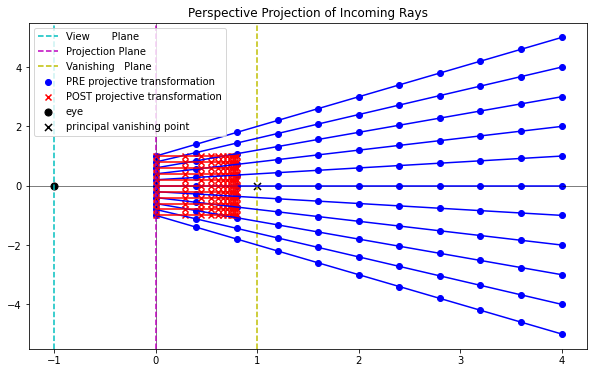

In [4]:
eps=1. # distance to the eye at which the first ray points get sampled
nx = ny = 11 # number of samples, number of rays

# some lines converging at the position of the eye
xs = np.linspace(x0+eps, 4, nx)
ys = (np.linspace(-1, 1, ny)[None,:]) * (xs[:,None] -x0)
lines = np.stack([xs[:,None] * np.ones(ys.shape[1]), ys], axis=2)

# plotting
plot_transformation(lines, A, x0)
_ = plt.title('Perspective Projection of Incoming Rays')

# 3. Perspective Projection of Parallel Lines:
We visualize the perspective projection of a set of parallel lines (blue). 

After the projection, all lines (red) now point towards a common vanishing point.

If the lines are parallel to the view direction, they converge in the principal vanishing point(black cross). 
Every other set of parallel lines (here differenciated by the slope factor) has its own vanishing point in the vanishing plane ($x=-x0$).

### 3.1 Slope Factor 0: Lines parallel to the viewing direction
The projection of the lines converge int he principal vanishing point

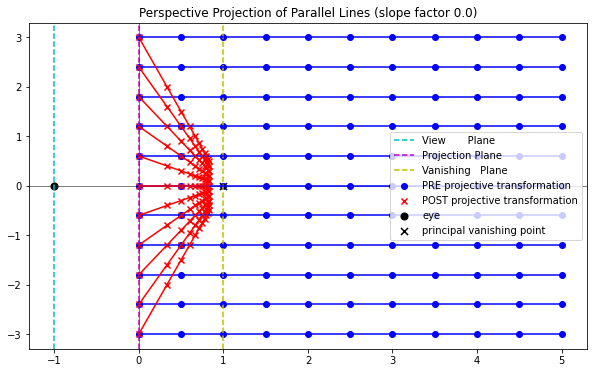

In [5]:
slope=0. # the slope of the parallel lines

eps=1. # distance to the eye at which the first ray points get sampled
nx = ny = 11 # number of samples, number of rays

xs = np.linspace(x0+eps, 5, nx)[None,:]
ys = xs * slope + np.linspace(-3, 3, ny)[:,None]
grid = np.stack([xs*np.ones((ny,1)), ys], axis=2).transpose(1,0,2)

# plot the grid as well as its projection
plot_transformation(grid, A, x0)
_ = plt.title('Perspective Projection of Parallel Lines (slope factor {})'.format(slope))

### 3.1 Slope Factor $\neq 0$: Lines parallel lines with a slope 

Note that the projected lines still converge, the vanishing point is a different one now, however it always lies on the vanishing plane $x = -x0$

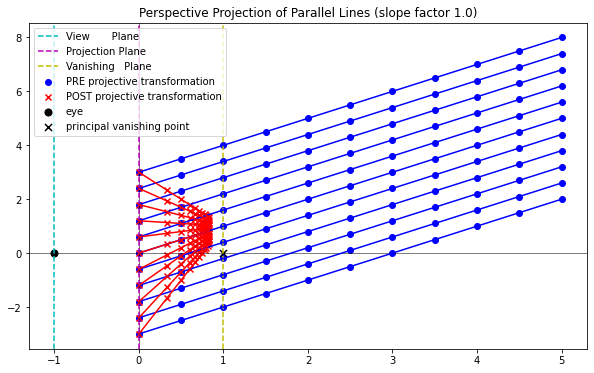

In [6]:
slope=1. # the slope of the parallel lines

eps=1. # distance to the eye at which the first ray points get sampled
nx = ny = 11 # number of samples, number of rays

xs = np.linspace(x0+eps, 5, nx)[None,:]
ys = xs * slope + np.linspace(-3, 3, ny)[:,None]
grid = np.stack([xs*np.ones((ny,1)), ys], axis=2).transpose(1,0,2)

# plot the grid as well as its projection
plot_transformation(grid, A, x0)
_ = plt.title('Perspective Projection of Parallel Lines (slope factor {})'.format(slope))

# 4. Fixed Points
The fixed points of the projections are all points that get mapped to themselves when applying the projective transformation. Note that we are working in homogeneous coordinates, therefore two points are equivalent if they are a multiple of each other. 

Let $p = \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$ be an arbitrary point in homogeneous coordinates.

$p$ is a fixed point if $Ap = p$.

Remember our projective transformation matrix
$A = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ \frac{1}{-x_0} & 0 & 1 \end{bmatrix}$.

Since we chose the eye position $x_0 = -1$, we get:
$A = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 1 & 0 & 1 \end{bmatrix}$.

This gives us:
$Ap = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 1 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1 \end{bmatrix} = \begin{bmatrix} x \\ y \\ x+1 \end{bmatrix}$

Therefore $x+1 = x \implies x = 0$. The set of fixed points is the plane given by $x=0$.

# 5. Points Mapped From or To Infinity.
For an arbitrary point $p = \begin{bmatrix} x \\ y \\ 1 \end{bmatrix}$ we have:

$Ap = \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 1 & 0 & 1 \end{bmatrix} \begin{bmatrix} x \\ y \\ 1\end{bmatrix} = \begin{bmatrix} x \\ y \\ x+1 \end{bmatrix}$

## 5.1 Mapping of infinite points to finite points
A point at infinity is a point for which $w=0$, let $p'$ be such a point, then:

$Ap' = \begin{bmatrix} x \\ y \\ x \end{bmatrix}$.
'
This point is finite iff $x \neq 0$. In this case, 
normalizing for a unit homogeneous coordinate, we get $\begin{bmatrix} 1 \\ y \\ 1 \end{bmatrix}$.
Therefore all infinite points that are not fixed points (see last section) are mapped to finite points.


## 5.2 Mapping of finite points to infinite points
We have $Ap = \begin{bmatrix} x \\ y \\ x+1 \end{bmatrix}$, this point is infinite iff $x+1=0 \implies x = -1 = x_0$. This is exactly the view plane.